In [50]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/FEM')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem
from FEMOL_utils import *
import numpy as np
np.set_printoptions(linewidth=110)

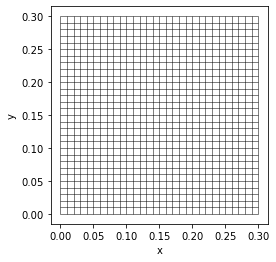

In [52]:
# Create a mesh
Lx = 0.30
Ly = 0.30
nelx = 30
nely = 30

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)

# Plot the mesh
mesh.plot(node_numbers=False)

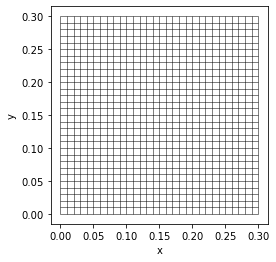

In [68]:
# Create the problem
Problem = FEM_Problem(mesh)

# Get the stress tensor from the layup
Problem.isotropic_plane_stress_tensor(1000000000, 0.3, 1000)

# Get the element matrix
Problem.plane_stress_Ke()

# Assemble the global matrix
Problem.assemble_plane_stress()

Problem.plot()

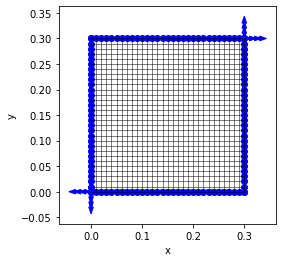

In [69]:
# Define a force and distribute it over a domain
domain_1 = create_domain([[0, Lx]], [Ly])
force_domain_1 = domain_1 # domain where the force is applied
force_1 = [1, 0] # Force vector [Fx, Fy]
Problem.add_forces(force_1, force_domain_1) # Add the force on the domains to the problem

domain_2 = create_domain([[0, Lx]], [0])
force_domain_2 = domain_2 # domain where the force is applied
force_2 = [-1, 0] # Force vector [Fx, Fy]
Problem.add_forces(force_2, force_domain_2) # Add the force on the domains to the problem

domain_2 = create_domain([0], [[0, Ly]])
force_domain_2 = domain_2 # domain where the force is applied
force_2 = [0, -1] # Force vector [Fx, Fy]
Problem.add_forces(force_2, force_domain_2) # Add the force on the domains to the problem

domain_2 = create_domain([Lx], [[0, Ly]])
force_domain_2 = domain_2 # domain where the force is applied
force_2 = [0, 1] # Force vector [Fx, Fy]
Problem.add_forces(force_2, force_domain_2) # Add the force on the domains to the problem

Problem.plot()

In [70]:
Results = Problem.solve()

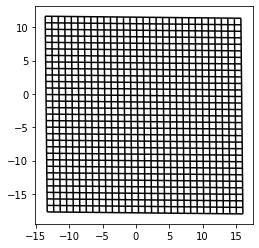

In [71]:
Results.mesh_displacement(scale=1)

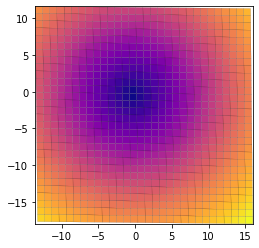

In [72]:
# Total displacement plot
Results.total_displacement(cmap='plasma')
ax = plt.gca()
ax.set_aspect('equal')

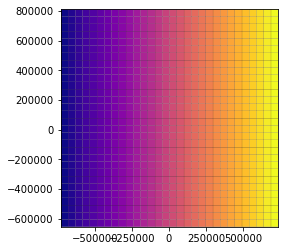

In [47]:
# X displacement plot
Results.x_displacement(cmap='plasma')
ax = plt.gca()
ax.set_aspect('equal')

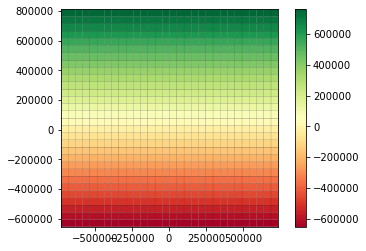

In [48]:
# Y displacement plot
Results.y_displacement(cmap='RdYlGn')
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal')
plt.show()